In [11]:
import matplotlib.pyplot as plt
import numpy as np
from graspy.simulations import sbm
from numpy.random import normal, poisson
from scipy.stats import norm
import random
import itertools
from math import exp as ex
from math import log
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
def get_edge(com1,com2,nodesPerCom,perActive):
    activeEdge = int(perActive*nodesPerCom**2/2)
    indx = []
    
    if com1 > com2:
        com1,com2 = com2,com1
        
    node1 = range((com1-1)*nodesPerCom,com1*nodesPerCom)
    node2 = range((com2-1)*nodesPerCom,com2*nodesPerCom)
    
    for i in node1:
        for j in node2:
            if i != j:
                indx.append((i,j))
    
    indx = random.sample(indx,activeEdge)
    
    return indx

In [13]:
N = 300 #total nodes
k = 12 #community number
P = .25
dim = 2
totalSample = 200

phen1 = np.asarray([100,100])
phen2Ratio = np.asarray([0.5, 0.5])
phen2 = phen1*phen2Ratio

Phen1activeCom1 = [(2,4),(6,8)]
Phen1activeCom2 = [(3,5),(9,11)]
Phen2activeCom1 = [(2,4),(3,5)]
Phen2activeCom2 = [(6,8),(9,11)]

y1 = np.zeros(totalSample)
y2 = np.zeros(totalSample)
nodeFlags = np.zeros(k)

In [14]:
G1 = np.zeros((phen1[0],N,N))
G2 = np.zeros((phen1[1],N,N))
indxG1 = []
indxG2 = []

nodesPerCom = int(N/k)
n = [nodesPerCom]*k
p = [[0.2]*k]*k
wt = [[normal]*k]*k
wtargs = []

for (i,j) in Phen1activeCom1:
    indxG1 = indxG1 + get_edge(i,i,nodesPerCom,P)
    indxG1 = indxG1 + get_edge(j,j,nodesPerCom,P)
    indxG1 = indxG1 + get_edge(i,j,nodesPerCom,P)
    
for (i,j) in Phen1activeCom2:
    indxG2 = indxG2 + get_edge(i,i,nodesPerCom,P)
    indxG2 = indxG2 + get_edge(j,j,nodesPerCom,P)
    indxG2 = indxG2 + get_edge(i,j,nodesPerCom,P)
    

indx_p2c11 = get_edge(Phen2activeCom1[0][0],Phen2activeCom1[0][1],nodesPerCom,P)
indx_p2c12 = get_edge(Phen2activeCom1[1][0],Phen2activeCom1[1][1],nodesPerCom,P)

indx_p2c21 = get_edge(Phen2activeCom2[0][0],Phen2activeCom2[0][1],nodesPerCom,P)
indx_p2c22 = get_edge(Phen2activeCom2[1][0],Phen2activeCom2[1][1],nodesPerCom,P)

for i in range(0,k):
    wtargs.append([])
    for j in range(0,k):
        if i!=j:
            wtargs[i].append({'loc': 0.1, 'scale': 0.18})
        else:
            wtargs[i].append({'loc': 0.3, 'scale': 0.18})

for k_ in range(0,phen1[0]):
    y1[k_] = 1
    G1[k_,:,:] = sbm(n=n, p=p, wt=wt, wtargs=wtargs)

    DiffEdge = norm.rvs(size=len(indxG1),loc=0.2,scale=0.18)
    for i in range(0,len(indxG1)):
        G1[k_,int(indxG1[i][0]),int(indxG1[i][1])] = DiffEdge[i] 
        G1[k_,int(indxG1[i][1]),int(indxG1[i][0])] = DiffEdge[i] 
    
    if k_ < phen2[0]:
        DiffEdge = norm.rvs(size=len(indx_p2c12),loc=0.2,scale=0.18)
        for i in range(0,len(indx_p2c12)):
            y2[k_] = 1
            
            G1[k_,int(indx_p2c12[i][0]),int(indx_p2c12[i][1])] = DiffEdge[i] 
            G1[k_,int(indx_p2c12[i][1]),int(indx_p2c12[i][0])] = DiffEdge[i] 
    else:
        DiffEdge = norm.rvs(size=len(indx_p2c22),loc=0.2,scale=0.18)
        for i in range(0,len(indx_p2c22)):
            G1[k_,int(indx_p2c22[i][0]),int(indx_p2c22[i][1])] = DiffEdge[i] 
            G1[k_,int(indx_p2c22[i][1]),int(indx_p2c22[i][0])] = DiffEdge[i]
            

for k_ in range(0,phen1[1]):
    G2[k_,:,:] = sbm(n=n, p=p, wt=wt, wtargs=wtargs)

    DiffEdge = norm.rvs(size=len(indxG2),loc=0.2,scale=0.18)
    for i in range(0,len(indxG1)):
        G2[k_,int(indxG2[i][0]),int(indxG2[i][1])] = DiffEdge[i] 
        G2[k_,int(indxG2[i][1]),int(indxG2[i][0])] = DiffEdge[i] 
    
    if k_ < phen2[1]:
        y2[k_+phen1[0]] = 1
        
        DiffEdge = norm.rvs(size=len(indx_p2c11),loc=0.2,scale=0.18)
        for i in range(0,len(indx_p2c11)):
            G2[k_,int(indx_p2c11[i][0]),int(indx_p2c11[i][1])] = DiffEdge[i] 
            G2[k_,int(indx_p2c11[i][1]),int(indx_p2c11[i][0])] = DiffEdge[i] 
    else:
        DiffEdge = norm.rvs(size=len(indx_p2c21),loc=0.2,scale=0.18)
        for i in range(0,len(indx_p2c21)):
            G2[k_,int(indx_p2c21[i][0]),int(indx_p2c21[i][1])] = DiffEdge[i] 
            G2[k_,int(indx_p2c21[i][1]),int(indx_p2c21[i][0])] = DiffEdge[i]

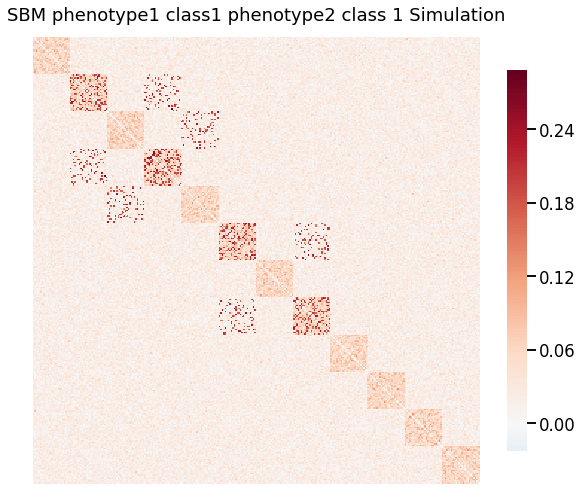

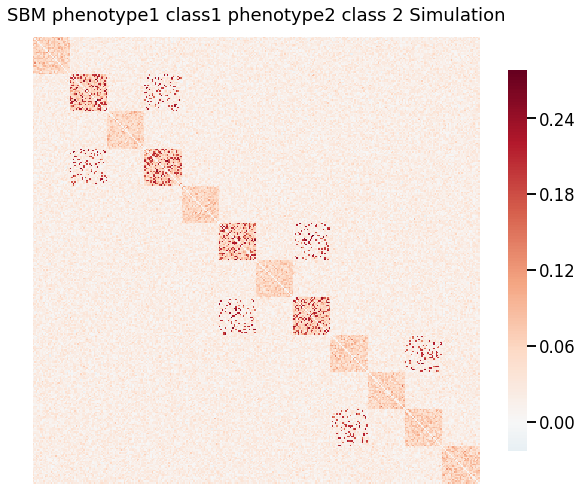

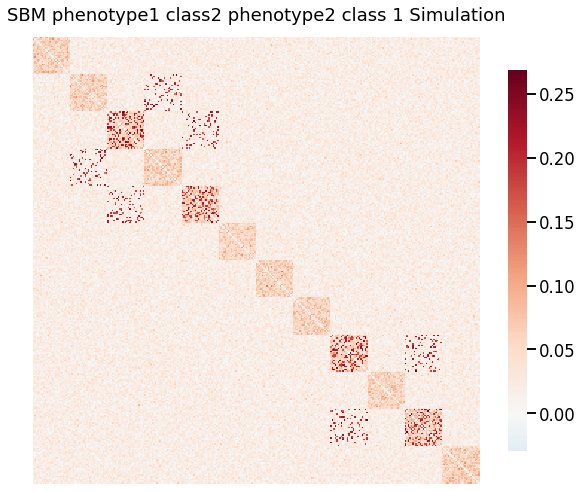

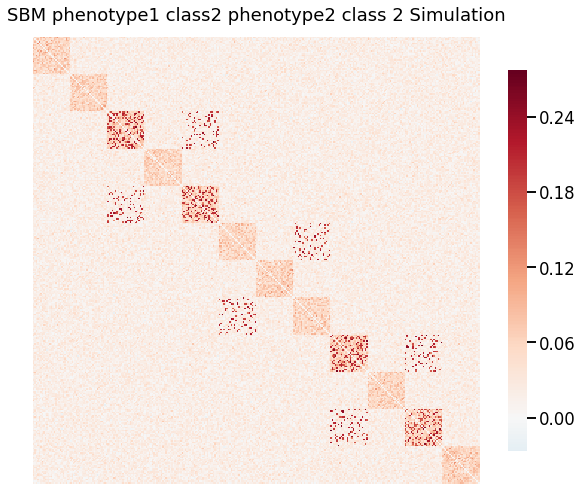

In [15]:
from graspy.plot import heatmap

heatmap(G1[0:50,:].mean(axis = 0), title ='SBM phenotype1 class1 phenotype2 class 1 Simulation')
heatmap(G1[50:100,:].mean(axis = 0), title ='SBM phenotype1 class1 phenotype2 class 2 Simulation')
heatmap(G2[0:50,:].mean(axis = 0), title ='SBM phenotype1 class2 phenotype2 class 1 Simulation')
heatmap(G2[50:100,:].mean(axis = 0), title ='SBM phenotype1 class2 phenotype2 class 2 Simulation')

In [16]:
A = np.concatenate((G1, G2), axis=0)

In [185]:
def fit_cls(A,e1,e2,y1,y2,iter,stepSize,rho,gamma):
    sampleTest,N,_ = A.shape
    dim1,_ = e1.shape
    dim2,_ = e2.shape
    
    B = np.ones((dim1,N,N), dtype=float)/(dim*N*N)
    a = np.zeros((dim2,dim1), dtype=float)
    b = 0
    
    S = np.zeros((dim1,1), dtype=float)

    for itr in range(1,iter):
        #loss = 0
        gradB = np.zeros((dim1,N,N), dtype=float)
        grada = np.zeros((dim2,dim1), dtype=float)
        sym = np.zeros((dim1,N,N), dtype=float)
        gradb = 0
        for k in range(0,sampleTest):
            tmp = b
            tmpGradB = np.zeros((dim1,N,N), dtype=float) 
            for j in range(0,dim1):
                if y1[k] == j:
                    for i in range(0,dim):
                        tmp -= e1[j,i]*np.sum(B[i,:,:]*A[k,:,:]) 
                        tmpGradB[i,:,:] -= e1[j,i]*A[k,:,:]
                else:
                    for i in range(0,dim):
                        tmp += e1[j,i]*np.sum(B[i,:,:]*A[k,:,:])
                        tmpGradB[i,:,:] += e1[j,i]*A[k,:,:]
                        
            for j in range(0,dim2):
                if y2[k] == j:
                    for i in range(0,dim):
                        tmp -= (e2[j,:]@a[:,i])*np.sum(B[i,:,:]*A[k,:,:])
                        tmpGradB[i,:,:] -= ( e2[j,:].reshape(1,-1)@a[:,i].reshape(-1,1) )*A[k,:,:]
                else:
                    for i in range(0,dim):
                        tmp += (e2[j,:]@a[:,i])*np.sum(B[i,:,:]*A[k,:,:])
                        tmpGradB[i,:,:] += ( e2[j,:].reshape(1,-1)@a[:,i].reshape(-1,1) )*A[k,:,:]
                        
        
            phi = ex(tmp)
            phi_ = phi/(1+phi)
            
            gradB += phi_*tmpGradB
            
        for i in range(0,dim):
            sym[i,:,:] = 2*(B[i,:,:]-B[i,:,:].T)

        gradB = gradB/sampleTest + rho*np.sign(B) + 2*gamma*B + sym
        B = B - stepSize*gradB
        
        for k in range(0,sampleTest):
            tmp = b
            tmpGrada = np.zeros((dim2,dim1),dtype=float)
            for j in range(0,dim1):
                if y1[k] == j:
                    for i in range(0,dim):
                        tmp -= e1[j,i]*np.sum(B[i,:,:]*A[k,:,:]) 
                else:
                    for i in range(0,dim):
                        tmp += e1[j,i]*np.sum(B[i,:,:]*A[k,:,:])
                        
            for j in range(0,dim2):
                if y2[k] == j:
                    for i in range(0,dim):
                        tmp -= (e2[j,:]@a[:,i])*np.sum(B[i,:,:]*A[k,:,:])
                else:
                    for i in range(0,dim):
                        tmp += (e2[j,:]@a[:,i])*np.sum(B[i,:,:]*A[k,:,:])
                        
                        
            for i in range(0,dim1):
                S[i] = np.sum(B[i,:,:]*A[k,:,:])
                
            
            for j in range(0,dim2):
                if y2[k] == j:
                    tmpGrada -= e2[j,:].reshape(-1,1)@S.reshape(1,-1)
                else:
                    tmpGrada += e2[j,:]@S
            
            phi = ex(tmp)
            phi_ = phi/(1+phi)
            
            grada += phi_*tmpGrada
        
        a = a - stepSize*grada/sampleTest
        #print(a)
        
        for k in range(0,sampleTest):
            tmp = b 
            for j in range(0,dim1):
                if y1[k] == j:
                    for i in range(0,dim):
                        tmp -= e1[j,i]*np.sum(B[i,:,:]*A[k,:,:]) 
                else:
                    for i in range(0,dim):
                        tmp += e1[j,i]*np.sum(B[i,:,:]*A[k,:,:])
                        
            for j in range(0,dim2):
                if y2[k] == j:
                    for i in range(0,dim):
                        tmp -= (e2[j,:]@a[:,i])*np.sum(B[i,:,:]*A[k,:,:])
                else:
                    for i in range(0,dim):
                        tmp += (e2[j,:]@a[:,i])*np.sum(B[i,:,:]*A[k,:,:])
                        
            #loss += log(1+phi)
            phi = ex(tmp)
            
            gradb += phi/(1+phi)
            
        b = b - stepSize*gradb/sampleTest
    #print(loss)
    return B,a,b

In [186]:
def predictAccuracy(B,a,b,e1,e2,A,y1,y2):
    l = len(y1)
    dim1,_ = e1.shape
    dim2,_ = e2.shape
    
    accuracy = np.zeros((2,1),dtype=float)
    S = np.zeros((dim1,1), dtype=float)
    
    for i in range(0,l):
        lbl1 = []
        lbl2 = []
        for i in range(0,dim1):
                S[i] = np.sum(B[i,:,:]*A[k,:,:])
                
        for j in range(0,dim1):
            lbl1.append(e1[j,:]@S)
            
        for j in range(0,dim2):
            lbl2.append(e2[j,:]@a@S)
        
        #print(lbl1,lbl2,y1[i],y2[i])
        phen1 = np.argmax(np.asarray(lbl1))
        phen2 = np.argmax(np.asarray(lbl2))
        #print(e@R@A[i,:,:]@C,y[i])
        #print('hi')
        #print(cls, y[i])
        if phen1 == y1[i]:
            accuracy[0] += 1
            
        if phen2 == y2[i]:
            accuracy[1] += 1

    return accuracy*100/l

In [187]:
def crossValidate(A,e1,e2,y1,y2,iter,stepSize,rho,gamma,fold):
    accuracy = np.zeros((2,1),dtype=float)
    _,count = np.unique(y, return_counts=True)
    totalSample, N, _ = A.shape
    
    count = count/totalSample
    indx = np.asarray(range(0,totalSample))
    random.shuffle(indx)
    
    testSample = int(totalSample/fold)
    for i in range(0,fold):
        indx = np.roll(indx,testSample)
        B,a,b = fit_cls(A[indx[0:totalSample-testSample],:,:],e1,e2,y1[indx[0:totalSample-testSample]],y2[indx[0:totalSample-testSample]],iter,stepSize,rho,gamma)
        testAccuracy = predictAccuracy(B,a,b,e1,e2,A[indx[totalSample-testSample:totalSample],:,:],y1[indx[totalSample-testSample:totalSample]],y2[indx[totalSample-testSample:totalSample]])
        accuracy += testAccuracy

    accuracy = accuracy/fold
    return accuracy

In [188]:
def getBase(dim):
    e = np.zeros((dim,dim),dtype=float)
    labelVec = np.asarray(range(1,dim+1),dtype=float)
    e[0,:] = labelVec/(labelVec@labelVec.T)**.5

    for i in range(1,dim):
        tmp = np.roll(labelVec,i)
        tmp = tmp.reshape(1,-1)
        tmp_ = tmp.copy()
        for j in range(0,i):
            eTmp = e[j,:].reshape(1,-1)
            tmp_ -= (tmp@eTmp.T/(eTmp@eTmp.T))*eTmp
            #print(tmp.shape)
        e[i,:] = tmp_/(tmp_@tmp_.T)**.5
    return e

In [ ]:
iter = 6000
stepSize = .1
B = np.ones((dim,N,N), dtype=float)/(dim*N*N)
b = 0
rho = 5e-4
gamma = 1e-6

fold = 10
accuracy = 0

_,count1 = np.unique(y1, return_counts=True)
dim1 = len(count1)

_,count2 = np.unique(y2, return_counts=True)
dim2 = len(count2)

e1 = getBase(dim1)
e2 = getBase(dim2)
totalSample, N, _ = A.shape

indx = np.asarray(range(0,totalSample))
random.shuffle(indx)

testSample = int(totalSample/fold)
for i in range(0,fold):
    print("Doing test on %d fold.........\n"%(i+1))
    B,a,b = fit_cls(A[indx[0:totalSample-testSample],:,:],e1,e2,y1[indx[0:totalSample-testSample]],y2[indx[0:totalSample-testSample]],iter,stepSize,rho,gamma)
    testAccuracy = predictAccuracy(B,a,b,e1,e2,A[indx[totalSample-testSample:totalSample],:,:],y1[indx[totalSample-testSample:totalSample]],y2[indx[totalSample-testSample:totalSample]])    
    accuracy += testAccuracy
    print(testAccuracy)
    
    indx = np.roll(indx,testSample)
accuracy = accuracy/fold
print("Total accuracy %f %f\n"%(accuracy[0],accuracy[1]))

Doing test on 1 fold.........



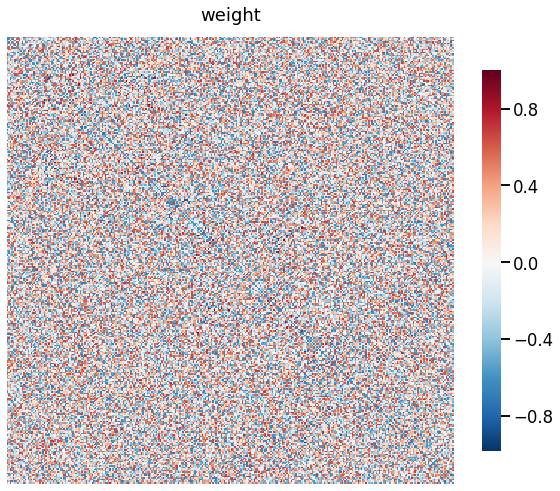

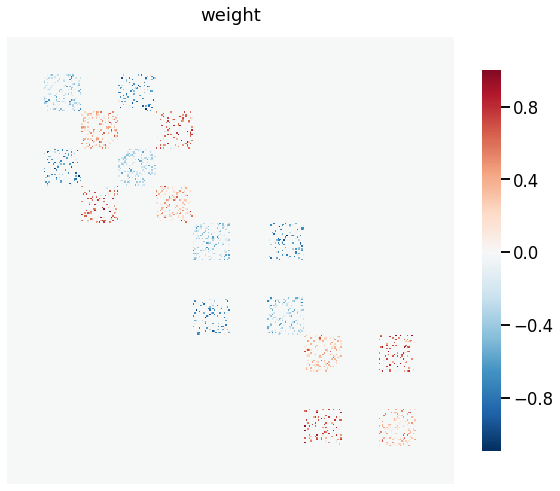

In [182]:
heatmap(B[0,:,:]/np.max(B[0,:,:]), title ='weight')
heatmap(B[1,:,:]/np.max(B[1,:,:]), title ='weight')

In [174]:
testAccuracy = predictAccuracy(B,a,b,e1,e2,A[indx[totalSample-testSample:totalSample],:,:],y1[indx[totalSample-testSample:totalSample]],y2[indx[totalSample-testSample:totalSample]])    

[array([-2.74828484]), array([1.98651028])] [array([-0.02988245]), array([-0.01623344])] 0.0 1.0
[array([-2.74828484]), array([1.98651028])] [array([-0.02988245]), array([-0.01623344])] 0.0 1.0
[array([-2.74828484]), array([1.98651028])] [array([-0.02988245]), array([-0.01623344])] 0.0 1.0
[array([-2.74828484]), array([1.98651028])] [array([-0.02988245]), array([-0.01623344])] 0.0 1.0
[array([-2.74828484]), array([1.98651028])] [array([-0.02988245]), array([-0.01623344])] 0.0 1.0
[array([-2.74828484]), array([1.98651028])] [array([-0.02988245]), array([-0.01623344])] 0.0 1.0
[array([-2.74828484]), array([1.98651028])] [array([-0.02988245]), array([-0.01623344])] 0.0 1.0
[array([-2.74828484]), array([1.98651028])] [array([-0.02988245]), array([-0.01623344])] 0.0 1.0
[array([-2.74828484]), array([1.98651028])] [array([-0.02988245]), array([-0.01623344])] 0.0 1.0
[array([-2.74828484]), array([1.98651028])] [array([-0.02988245]), array([-0.01623344])] 0.0 1.0
[array([-2.74828484]), array([

In [180]:
testAccuracy

array([[100.],
       [100.]])

In [179]:
e1@a

array([[-0.00126264,  0.00772833],
       [-0.00492155,  0.00812766]])

In [170]:
y1[indx[totalSample-testSample:totalSample]]

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0.])